In [206]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

y = cancer.target
# 속성별 평균
m = cancer.data.mean(axis=0)

# 속성별 표준편차
s = cancer.data.std(axis=0)

# 정규 데이터
x = (cancer.data - m)/s
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.25,random_state=22)

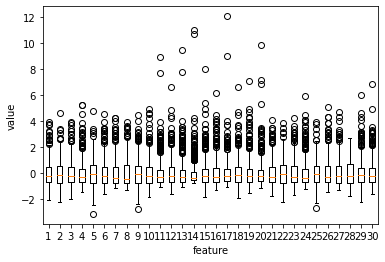

In [207]:
import matplotlib.pyplot as plt

plt.boxplot(x)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [216]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=x_train.shape[1], activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.003),  metrics=['accuracy'])
tf.model.summary()
print(x_train.shape)

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
(426, 30)


In [213]:
history = tf.model.fit(x_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 1ms/step - loss: 0.8603 - accuracy: 0.4420
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7412 - accuracy: 0.5646
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.6112
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.6505
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.7031
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.7234
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.7483
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.7516
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.8130
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.8129
Epoch 11/

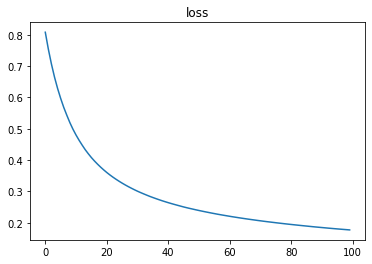

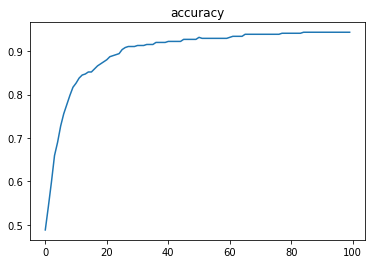

In [214]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

plt.title('accuracy')
plt.plot(history.history['accuracy'])
plt.show()
# print("Accuracy: {0}".format(history.history['accuracy'][-1]))

In [215]:
predict = tf.model.predict([x_test])
y_predict = [1 if i > 0.5 else 0 for i in predict]
np.mean(y_predict == y_test)

0.916083916083916